In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
t = pd.read_excel('C:/Users/stefa/Desktop/Romania_regression.xlsx')
t

,Depth,Previous,Mag
0,9.9,0,3.2
1,9.9,0,4.5
2,9.9,0,5.5
3,9.9,0,2.6
4,9.9,0,4.2
...,...,...,...
30499,5.9,35,1.9
30500,5.0,35,1.9
30501,20.3,35,1.9
30502,74.3,35,3.0


In [14]:
train = t[:30000]
train
test = t[30000:]
test

,Depth,Previous,Mag
30000,29.0,34,1.7
30001,23.3,34,1.7
30002,12.6,34,1.8
30003,34.3,34,1.8
30004,57.2,34,2.0
...,...,...,...
30499,5.9,35,1.9
30500,5.0,35,1.9
30501,20.3,35,1.9
30502,74.3,35,3.0


In [15]:
X = train.iloc[:,0:2]
y = train.iloc[:,2]
test[['Depth','Previous']]
real = pd.DataFrame(test['Mag'])
real.rename(columns= {'Mag': 'Real_mag'}, inplace=True)
real.reset_index(inplace=True)
real.drop(columns = 'index', inplace=True)
real


,Real_mag
0,1.7
1,1.7
2,1.8
3,1.8
4,2.0
...,...
499,1.9
500,1.9
501,1.9
502,3.0


In [16]:
reg = LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_)
print(reg.intercept_)

0.45389460600691345
[ 0.00887073 -0.01395831]
2.3101539102999205


In [17]:
p = reg.predict(test[['Depth','Previous']])
p

array([2.09282252, 2.04225938, 1.9473426 , 2.13983738, 2.34297702,
       1.84444217, 1.98992209, 2.64990418, 2.01032476, 2.41926528,
       1.86129655, 2.88231722, 1.95976162, 1.92073042, 1.89677946,
       1.93048822, 2.57627714, 3.00207204, 1.92427871, 1.86218362,
       1.92427871, 1.84444217, 2.01653427, 1.86307069, 1.97129356,
       2.02363085, 1.90565018, 1.90742433, 1.94379431, 1.99258331,
       2.72619243, 1.94202016, 1.94556845, 1.89766653, 1.94645553,
       1.91097262, 2.67385514, 1.94202016, 1.99435745, 1.86750606,
       1.89944067, 2.00234111, 1.92871407, 1.93048822, 2.65788783,
       2.75103047, 2.91868721, 1.87548971, 1.9571004 , 2.85925333,
       1.90210189, 3.13779416, 1.86573191, 1.92427871, 1.97395478,
       1.85331289, 1.86573191, 1.88347337, 1.92161749, 1.86750606,
       2.01830842, 2.0351628 , 1.87548971, 1.86750606, 1.94202016,
       1.86218362, 1.88702166, 1.92161749, 1.92960115, 1.8595224 ,
       1.89145702, 1.88790873, 1.88524751, 2.84594724, 1.91629

In [18]:
pred = pd.DataFrame(p)
pred.rename(columns= {0: 'Predicted_mag'}, inplace=True)
pred

,Predicted_mag
0,2.092823
1,2.042259
2,1.947343
3,2.139837
4,2.342977
...,...
499,1.873950
500,1.865967
501,2.001689
502,2.480708


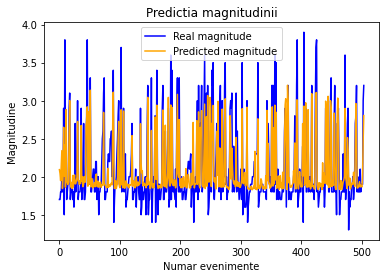

In [19]:
#Plot the test predictions
plt.plot(real, color = 'blue', label = 'Real magnitude')
plt.plot(pred, color = 'orange', label = 'Predicted magnitude')
plt.title('Predictia magnitudinii')
plt.xlabel('Numar evenimente')
plt.ylabel('Magnitudine')
plt.legend()
plt.show()

In [23]:
mean_squared_error(real,pred)

0.09723113870363519